[0, 4, 3, 1, 5, 2, 6, 0]
Element (4,0): 5 has been fulfilled!
Element (3,0): 3 has been fulfilled!
Element (1,0): 6 has been fulfilled!
Element (5,0): 2 has been fulfilled!
Element (2,0): 4 has been fulfilled!
Element (6,0): 8 has been fulfilled!
[0, 4, 3, 1, 5, 2, 6, 0]
The distance covered by a_star_1 is 27.51358281021765
[[(47.17, 1, 5.16, 2.65)], [(89.37, 6, 5.04, 6.97)], [(83.08, 4, 2.53, 0.21)], [(80.13, 3, 6.64, 9.74)], [(62.31, 5, 8.38, 2.84)], [(21.44, 2, 0.53, 0.72)], [(81.72, 8, 2.7, 1.8)]]
Optimal Path: [0, 5, 3, 4, 1, 2, 6]
Total Profit: 4888.0
[0, 5, 3, 4, 1, 2, 6, 0]
Element (5,0): 21.44 has been fulfilled!
Element (3,0): 80.13 has been fulfilled!
Element (4,0): 62.31 has been fulfilled!
Element (1,0): 89.37 has been fulfilled!
Element (2,0): 83.08 has been fulfilled!
Element (6,0): 81.72 has been fulfilled!
[0, 5, 3, 4, 1, 2, 6, 0]
[0, 4, 3, 1, 5, 2, 6, 0]
Element (4,0): 5 has been fulfilled!
Element (3,0): 3 has been fulfilled!
Element (1,0): 6 has been fulfilled!
Elem

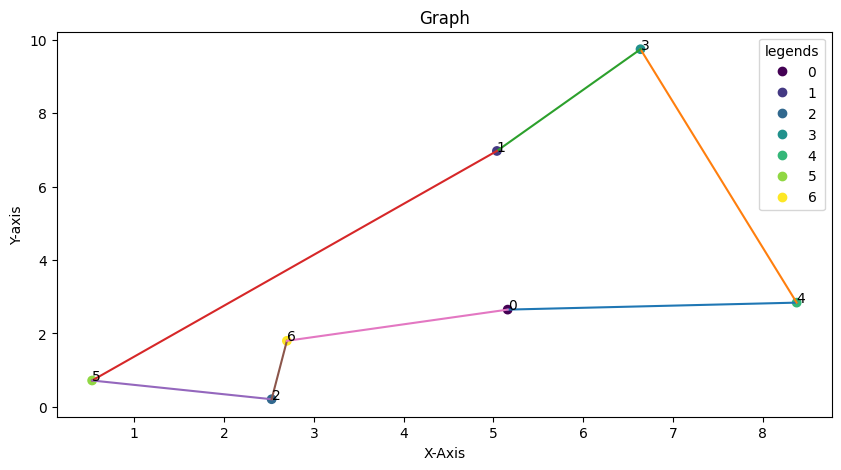

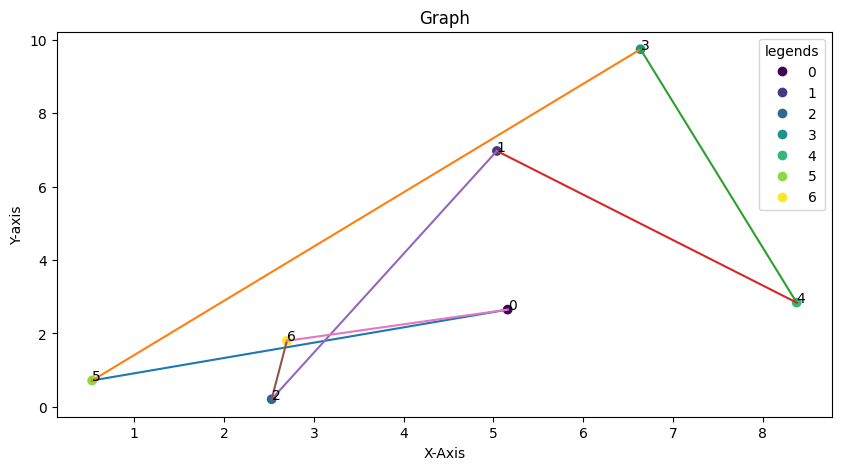

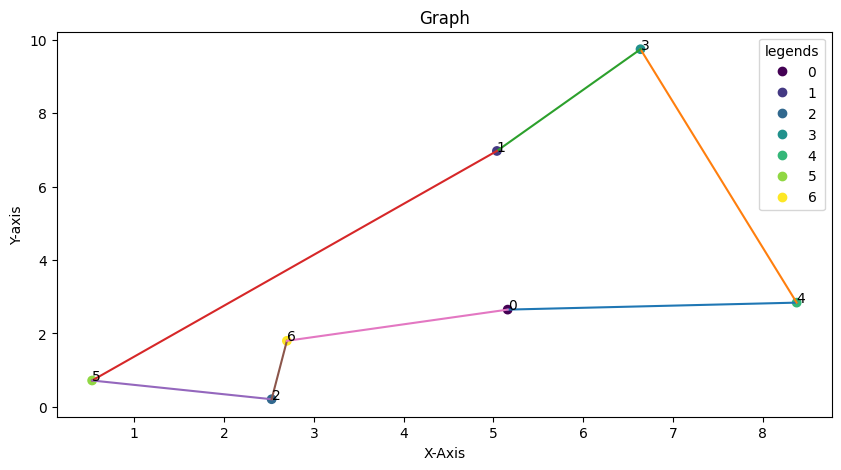

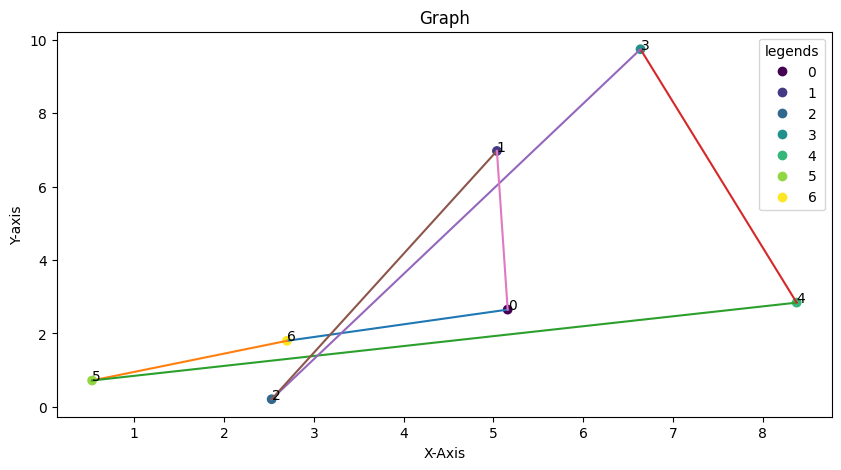

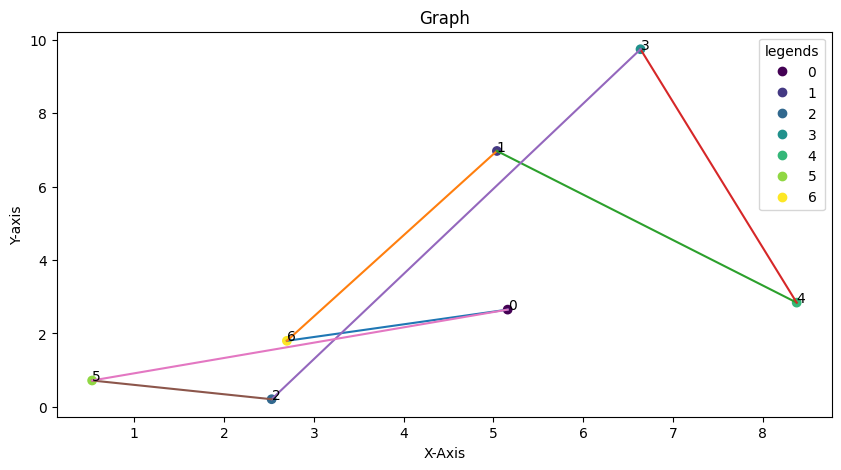

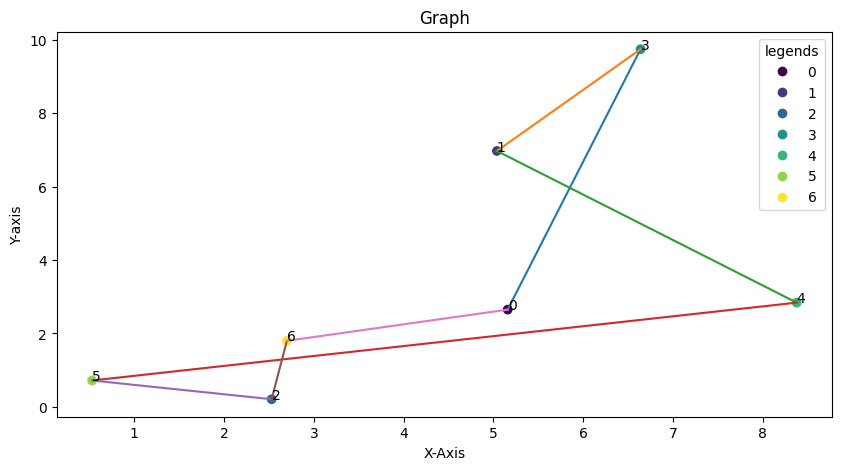

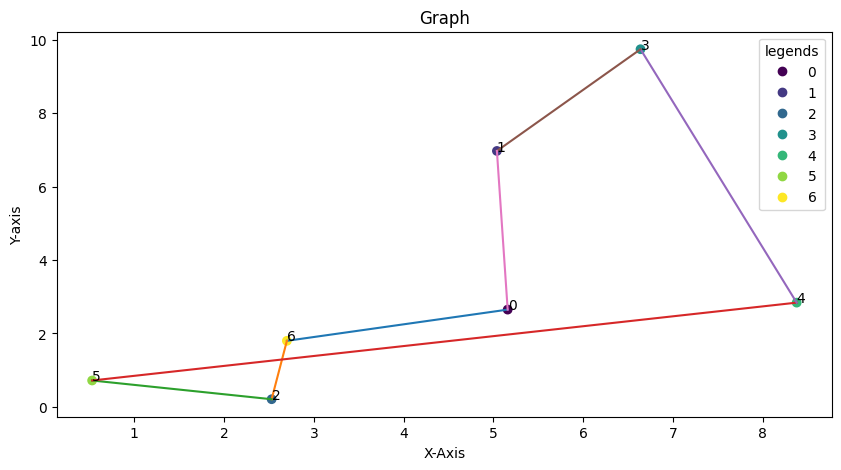

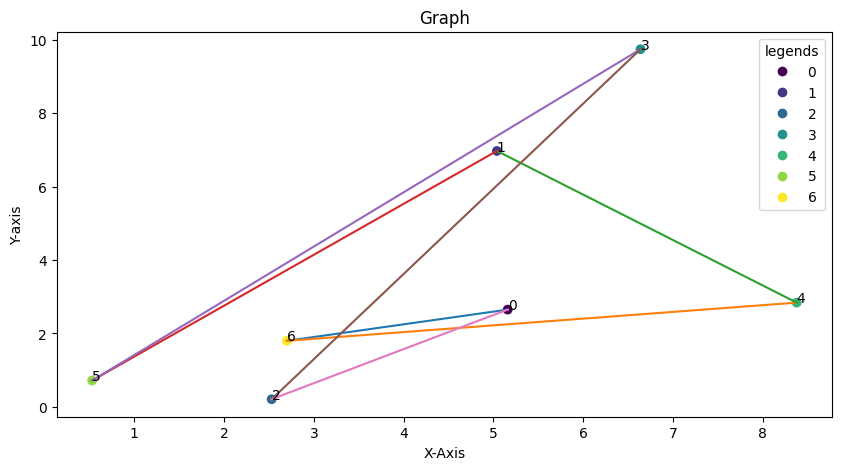

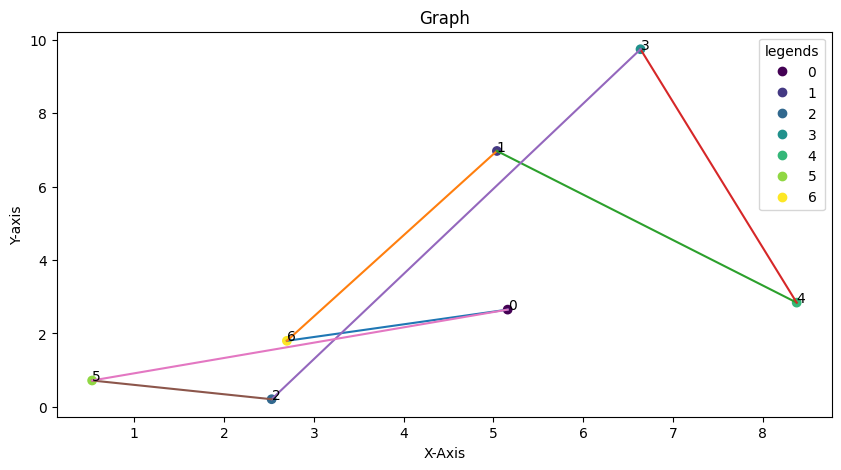

In [2]:
import random
import numpy as np 
import matplotlib.pyplot as plt
import math


def create_instance(N,M):
    vrp_dataset=[]
    for i in range(N):
        vrp_dataset.append([])
        x=format((random.random()*10),".2f")
        y=format((random.random()*10),".2f")
        for j in range(M):
            vrp_dataset[i].append(((float(format((random.random() * 100), ".2f"))), (int(random.random() * 9 + 1)), float(x), float(y))) #profit,demand,x,y
    return vrp_dataset

def euc_dist(x1,y1,x2,y2):
    dist = np.sqrt((x1-x2)**2 +(y1-y2)**2)
    return(dist)

def mst_profit_node_basis(remaining_nodes,profits):
        tot_profit = 0
        visited = set([0])
        while len(visited) != len(profits):
            max_node = (None, float('-inf'))
            for node in visited:
                for neighbor, profit in enumerate(profits):
                    if neighbor in remaining_nodes and profit > max_node[1]:
                        max_node = (neighbor,profit)
            if max_node[0] is None:  
                break
            visited.add(max_node[0])
            remaining_nodes.remove(max_node[0])
            tot_profit += max_node[1]
        return tot_profit

def mst_profit_cost_basis(remaining_nodes,adjM,profits):
        cost = 0
        visited = set([0])
        while len(visited) != len(adjM):
            min_edge = (None, float('inf'))
            for node in visited:
                for neighbor, dist in enumerate(adjM[node]):
                    if neighbor in remaining_nodes and dist/profits[neighbor] < min_edge[1]:   ## Here is the big change!
                        min_edge = (neighbor, dist)
            if min_edge[0] is None:  
                break
            visited.add(min_edge[0])
            remaining_nodes.remove(min_edge[0])
            cost += min_edge[1]
        return cost

def mst_cost_edge_basis(remaining_nodes, adjM):
        cost = 0
        visited = set([0])
        while len(visited) != len(adjM):
            min_edge = (None, float('inf'))
            for node in visited:
                for neighbor, dist in enumerate(adjM[node]):
                    if neighbor in remaining_nodes and dist < min_edge[1]:
                        min_edge = (neighbor, dist)
            if min_edge[0] is None:  
                break
            visited.add(min_edge[0])
            remaining_nodes.remove(min_edge[0])
            cost += min_edge[1]
        return cost

def heuristic(path, adjM,choice):
    remaining_nodes = set(range(len(adjM))) - set(path)
    if choice==1:
        return mst_cost_edge_basis(remaining_nodes, adjM)
    elif choice==2:
        return mst_profit_node_basis(remaining_nodes,adjM)

def swap(path, n):
    p1 = 0
    p2 = 0
    while p1 == p2 or p1==0 or p2==0:
        p1 = int(random.random() * n)
        p2 = int(random.random() * n)
        
    
        
    temp = path[p1]
    path[p1] = path[p2]
    path[p2] = temp
    return path

def calc_profit(path,profits):
    tot_profit = 0
    n = len(path)
    
    for i in range(n-1):
        tot_profit += profits[path[i]]
        
    return tot_profit

def heuristic1(path,adjM,profits):
    remaining_nodes = set(range(len(adjM))) - set(path)
    return mst_profit_cost_basis(remaining_nodes, adjM,profits)


def calc_profits(vrp_data,N,M):
    profits=[0] * N
    for i in range(N):
        for j in range(M):
            profits[i]+=vrp_data[i][j][0]*vrp_data[i][j][1]

    return(profits)
    


def dist_covered(path, dist_matrix):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += dist_matrix[path[i]][path[i + 1]]
    # Add distance from last node back to the starting node
    total_distance += dist_matrix[path[-1]][path[0]]
    return total_distance


class PQ:
    def __init__(self):
        self.q = []
        
    def isempty(self):
        return len(self.q) == 0
    
    def insert(self, x):
        self.q.append(x)
    
    def delete(self):
        k = 0
        try:
            min_val = float('infinity')
            for i in range(len(self.q)):
                if self.q[i][1] < min_val:
                    min_val = self.q[i][1]
                    k = i
            return self.q.pop(k)
        except IndexError:
            print("Priority queue is empty.")
            exit()



def mutation(offspring,mutation_rate):
        for i in range(len(offspring)):
            if random.random() < mutation_rate:
                mutation_point1, mutation_point2 = random.sample(range(len(offspring)), 2)
                offspring[mutation_point1], offspring[mutation_point2] = (
                    offspring[mutation_point2],
                    offspring[mutation_point1],
                )
        return offspring

def evolve_population(population, population_size, mutation_rate):
        # Perform selection, crossover, and mutation to create the next generation
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population, 2)
            if len(parent1)==len(parent2):
                offspring1, offspring2 = crossover(parent1, parent2,len(parent1))
                offspring1 = mutation(offspring1,mutation_rate)
                offspring2 = mutation(offspring2,mutation_rate)
                new_population.extend([offspring1, offspring2])
        return new_population

def crossover(parent1, parent2,n):
        # Perform crossover to create offspring from selected parents
        crossover_point = random.randint(1,n - 2)
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
        return offspring1, offspring2


class VRP:
    def __init__(self,N,M,C,dmax,vrp_dataset):
        self.num_points=N
        self.num_type=M
        self.cap_list=C
        self.vrp_dataset=vrp_dataset
        self.dist_matrix=self.edge_matrix()
        self.dmax=dmax
        

    def edge_matrix(self):
        n = self.num_points
        dist_matrix = [[0]*n for _ in range(n)]
        for i in range(n):
               for j in range(i+1,n):
                    dist = euc_dist(self.vrp_dataset[i][0][2],self.vrp_dataset[i][0][3],self.vrp_dataset[j][0][2],self.vrp_dataset[j][0][3])
                    dist_matrix[i][j]=dist
                    dist_matrix[j][i]= dist

        #print(dist_matrix)
        #print(heuristic([],dist_matrix))
        return(dist_matrix)

    

    def solve_a_star1(self):
        path = [0]
        total_cost = 0
        final_path=[]
        adjM=self.dist_matrix
        
        
        q = PQ()
        q.insert((path, heuristic(path, adjM,1)))
        
        while not q.isempty():
            curr_path, curr_cost = q.delete()
            if len(curr_path) == self.num_points:
                curr_cost += adjM[curr_path[-1]][0]  # Return to the starting node
               # print("Optimal Path:", curr_path)
                final_path=curr_path
               # print("Total Cost:", curr_cost)
                break
            
            last_node = curr_path[-1]
            for neighbor, dist in enumerate(adjM[last_node]):
                if neighbor not in curr_path:
                    new_path = curr_path + [neighbor]
                    new_cost = curr_cost + dist + heuristic(new_path, adjM,1)
                    q.insert((new_path, new_cost))

        

        new_path=[0]
        i=1
        while dist_covered(new_path,self.dist_matrix) < self.dmax and i!=len(final_path):
            new_path.append(final_path[i])
            i+=1

        new_path.append(0)
        print(new_path)
        new_path.pop()
        

        c=self.cap_list

        final_path_2=[0]
        for i in range(1,len(new_path)):
            for j in range(self.num_type):
                if c[j] >= self.vrp_dataset[new_path[i]][j][1]:
                 print(f"Element ({new_path[i]},{j}): {self.vrp_dataset[new_path[i]][j][1]} has been fulfilled!")
                 c[j]-=self.vrp_dataset[new_path[i]][j][1]
                 final_path_2.append(new_path[i])

        final_path_2.append(0)
        print(final_path_2)
        final_path_2.pop()
        self.plot(final_path_2)
        return(final_path_2)

    def solve_a_star2(self):
        path = [0]
        total_cost = 0
        final_path=[]
        adjM=self.dist_matrix
        print(self.vrp_dataset)
        
        
        q = PQ()
        profits=calc_profits(self.vrp_dataset,self.num_points,self.num_type)
       # print(profits)
        
        q.insert((path, heuristic(path,profits,2)))
        
        while not q.isempty():
            curr_path, curr_profit = q.delete()
            if len(curr_path) == self.num_points:
                curr_profit += profits[curr_path[-1]]  # Return to the starting node
                print("Optimal Path:", curr_path)
                final_path=curr_path
                print("Total Profit:", curr_profit)
                break
            
            last_node = curr_path[-1]
            for neighbor, dist in enumerate(adjM):
                if neighbor not in curr_path:
                    new_path = curr_path + [neighbor]
                    new_cost = curr_profit + profits[neighbor]
                    q.insert((new_path, new_cost))

        

        new_path=[0]
        i=1
        while dist_covered(new_path,self.dist_matrix) < self.dmax and i!=len(final_path):
            new_path.append(final_path[i])
            i+=1

        new_path.append(0)
        print(new_path)
        new_path.pop()
        

        c=self.cap_list
        

        final_path_2=[0]
        for i in range(1,len(new_path)):
            for j in range(self.num_type):
                if c[j] >= self.vrp_dataset[new_path[i]][j][0]:
                 print(f"Element ({new_path[i]},{j}): {self.vrp_dataset[new_path[i]][j][0]} has been fulfilled!")
                 c[j]-=self.vrp_dataset[new_path[i]][j][0]
                 final_path_2.append(new_path[i])

        final_path_2.append(0)
        print(final_path_2)
        final_path_2.pop()
        self.plot(final_path_2)
        return(final_path_2)

    def solve_a_star3(self):
        path = [0]
        total_cost = 0
        final_path=[]
        adjM=self.dist_matrix
        
        
        
        q = PQ()
        profits=calc_profits(self.vrp_dataset,self.num_points,self.num_type)
        q.insert((path, heuristic1(path, adjM,profits)))
        
        while not q.isempty():
            curr_path, curr_cost = q.delete()
            if len(curr_path) == self.num_points:
                curr_cost += adjM[curr_path[-1]][0]  # Return to the starting node
               # print("Optimal Path:", curr_path)
                final_path=curr_path
               # print("Total Cost:", curr_cost)
                break
            
            last_node = curr_path[-1]
            for neighbor, dist in enumerate(adjM[last_node]):
                if neighbor not in curr_path:
                    new_path = curr_path + [neighbor]
                    new_cost = curr_cost + dist + heuristic(new_path, adjM,1)
                    q.insert((new_path, new_cost))

        

        new_path=[0]
        i=1
        while dist_covered(new_path,self.dist_matrix) < self.dmax and i!=len(final_path):
            new_path.append(final_path[i])
            i+=1

        new_path.append(0)
        print(new_path)
        new_path.pop()
        

        c=self.cap_list

        final_path_2=[0]
        for i in range(1,len(new_path)):
            for j in range(self.num_type):
                if c[j] >= self.vrp_dataset[new_path[i]][j][1]:
                 print(f"Element ({new_path[i]},{j}): {self.vrp_dataset[new_path[i]][j][1]} has been fulfilled!")
                 c[j]-=self.vrp_dataset[new_path[i]][j][1]
                 final_path_2.append(new_path[i])

        final_path_2.append(0)
        print(final_path_2)
        final_path_2.pop()
        self.plot(final_path_2)
        return(final_path_2)

    def solve_dfbb_with_heuristic(self):
        stack = [(0, [0])]  # Initialize stack with starting node
        final_path = []
        adjM = self.dist_matrix
        profits = calc_profits(self.vrp_dataset, self.num_points, self.num_type)
        
        while stack:
            curr_cost, curr_path = stack.pop()  # Pop the path with the lowest cost
            
            if len(curr_path) == self.num_points:
                curr_cost += adjM[curr_path[-1]][0]  # Return to the starting node
                final_path = curr_path
                break
            
            last_node = curr_path[-1]
            for neighbor, dist in enumerate(adjM[last_node]):
                if neighbor not in curr_path:
                    new_path = curr_path + [neighbor]
                    new_cost = curr_cost +dist+ heuristic(new_path, adjM,1)
                    stack.append((new_cost, new_path))
        
        new_path = [0]
        for node in final_path[1:]:
            new_path.append(node)
            if dist_covered(new_path, self.dist_matrix) >= self.dmax:
                break
        
        new_path.append(0)
        final_path_2 = [0]
        c = self.cap_list
        
        for node in new_path[1:]:
            for j in range(self.num_type):
                if c[j] >= self.vrp_dataset[node][j][1]:
                    print(f"Element ({node},{j}): {self.vrp_dataset[node][j][1]} has been fulfilled!")
                    c[j] -= self.vrp_dataset[node][j][1]
                    final_path_2.append(node)
        

        print(final_path_2)
        final_path_2.pop()
        self.plot(final_path_2)
        return(final_path_2)

    def SA(self,p1,p2,p3,p4):
        def SA_worker(init_solution):
            p= init_solution
            if(len(init_solution)==0):
                return init_solution
            profits = calc_profits(self.vrp_dataset, self.num_points, self.num_type)
            cost=calc_profit(p,profits)/dist_covered(p,self.dist_matrix)
            e = math.e
            temp = 1e+10
            cf = 0.97
            costs = [cost]
            num_iter = 0
            
            
            while temp > 0:
                num_iter += 1
                if num_iter > 5000:
                    break
                temp *= cf
                new_p = swap(p,len(p))
                new_cost = calc_profit(new_p,profits)/(dist_covered(new_p,self.dist_matrix)+0.001)
                delta_cost = -(new_cost - cost)
                
                if delta_cost < 0 or random.random() < math.exp(-delta_cost / (temp + 0.001)):
                    p = new_p
                    cost = new_cost
                    costs.append(cost)
                    
                if temp <= 0:
                    break
                    
            print(f"Path is :{p}")
            self.plot(p)
            return(p)

        initial_solutions = [p1,p2,p3,p4]
        p_finals=[]
        #threads = []
        for init_solution in initial_solutions:
            p=SA_worker(init_solution)
            p_finals.append(p)

        profits = calc_profits(self.vrp_dataset, self.num_points, self.num_type)
        best_solution = []
        maxi=0
        maximum=float("-inf")
        for i in range(len(p_finals)):
            if calc_profit(p_finals[i],profits)>maximum:
                maximum=calc_profit(p_finals[i],profits)
                best_solution=p_finals[i]
        best_cost = dist_covered(best_solution,self.dist_matrix)
        best_solution.append(0)
        print(f"This is the best solution after all 4 heuristic and SA:{best_solution}, the distance covered is {best_cost}, the total profit is {maximum}")
        best_solution.pop()
        self.plot(best_solution)

        return(p_finals)
          #  threads.append(thread)
          #  thread.start()
            
       # for thread in threads:
          #  thread.join()
            
      #  print("All threads completed")
        
    
    def GA(self,p_finals):
        population=p_finals
        costs=[]
        profits=[]
        profits_for_data = calc_profits(self.vrp_dataset, self.num_points, self.num_type)
        for i in range(len(population)):
            costs.append(dist_covered(p_finals[i],self.dist_matrix))
            profits.append(calc_profit(p_finals[i],profits_for_data))
    
      #  print(costs)
      #  print(profits)
        num_generations=100
        population_size=4
        mutation_rate=0.75
        for _ in range(num_generations):
            population = evolve_population(population, population_size, mutation_rate)
        
        best_solution = []
        maxi=0
        for i in range(len(population)):
            maximum=float("-inf")
            if calc_profit(population[i],profits_for_data)>maximum:
                maximum=calc_profit(population[i],profits_for_data)
                best_solution=population[i]
        print(best_solution)
        best_cost = dist_covered(best_solution,self.dist_matrix)
        self.plot(best_solution)
       # return best_solution, best_cost
           


    
    def plot(self,path):
        x = []
        y = []
        p = []     # you have to modify the profits here , since each item will be sold differently and some amount of it.

        if(len(path)==0):
            return

        for i in range(self.num_points):
            x.append(float(self.vrp_dataset[i][0][2]))
            y.append(float(self.vrp_dataset[i][0][3]))
            p.append(i)

        fig,ax = plt.subplots(figsize=(10,5))
        abc = ax.scatter(x=x,y=y,c=p)
        ax.set(xlabel="X-Axis",ylabel="Y-axis",title="Graph")
        ax.legend(*abc.legend_elements(),title="legends")
        for i in range(self.num_points):
            plt.text(x[i],y[i],str(i))
        for i in range(len(path)-1):
            plt.plot([x[path[i]],x[path[i+1]]],[y[path[i]],y[path[i+1]]])
        plt.plot([x[0],x[path[-1]]],[y[0],y[path[-1]]])

    
    
        

def main():
    N=int(input("Enter the number of nodes in the graph:"))
    M=int(input("Enter the types of items possible:"))
    C=[]
    dmax=int(input("Enter the maximum distance he can cover:"))
    for i in range(M):
        C.append(float(input(f"Enter the total amount of the item {i} the vehicle has:")))

    vrp_dataset=create_instance(N,M)
    #print(vrp_dataset)
    vrp=VRP(N,M,C,dmax,vrp_dataset)
    p1=vrp.solve_a_star1()
    print(f"The distance covered by a_star_1 is {dist_covered(p1,vrp.dist_matrix)}")
    p2=vrp.solve_a_star2()
    p3=vrp.solve_a_star3()
    p4=vrp.solve_dfbb_with_heuristic()
    p_finals=vrp.SA(p1,p2,p3,p4)
   # vrp.GA(p_finals)   didn't work because crossover mixes it up. How to fix this?
   
    

if __name__=="__main__":
    main()